In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing = fetch_california_housing()
X = fetch_california_housing.data
y = fetch_california_housing.target

data = pd.DataFrame(X, columns=fetch_california_housing.feature_names)
data["SalePrice"] = y # saleprice
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
print(fetch_california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print(data.shape)

(20640, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Data Correlation

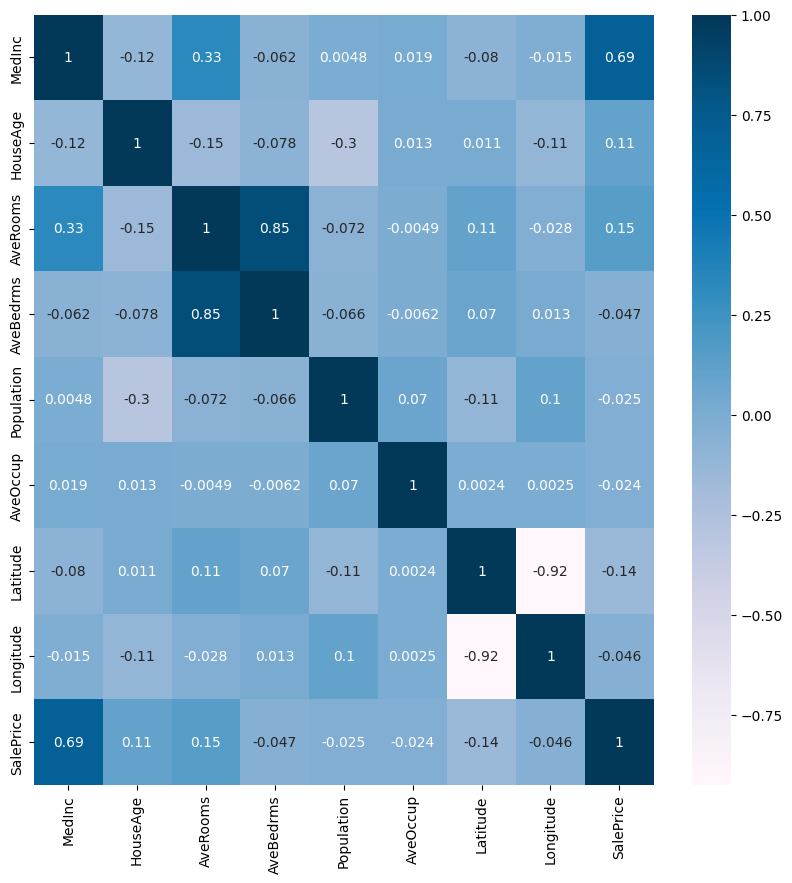

In [7]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [8]:
cor_target = abs(cor["SalePrice"]) # absolute value of the correlation

relevant_features = cor_target[cor_target>0.1] # highly correlated features

names = [index for index, value in relevant_features.iteritems()] # getting the names of the features

names.remove('SalePrice') # removing target feature

print(names) # printing the features
print(len(names))

['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
4


<ipython-input-8-5c69ad8d5fa5>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  names = [index for index, value in relevant_features.iteritems()] # getting the names of the features


In [9]:
irrelevant_features = cor_target[cor_target<=0.1]

irrelevant_names = [index for index, value in irrelevant_features.iteritems()]

data = data.drop(irrelevant_names, axis = 1)

print(data)

       MedInc  HouseAge  AveRooms  Latitude  SalePrice
0      8.3252      41.0  6.984127     37.88      4.526
1      8.3014      21.0  6.238137     37.86      3.585
2      7.2574      52.0  8.288136     37.85      3.521
3      5.6431      52.0  5.817352     37.85      3.413
4      3.8462      52.0  6.281853     37.85      3.422
...       ...       ...       ...       ...        ...
20635  1.5603      25.0  5.045455     39.48      0.781
20636  2.5568      18.0  6.114035     39.49      0.771
20637  1.7000      17.0  5.205543     39.43      0.923
20638  1.8672      18.0  5.329513     39.43      0.847
20639  2.3886      16.0  5.254717     39.37      0.894

[20640 rows x 5 columns]


<ipython-input-9-ce041d121857>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  irrelevant_names = [index for index, value in irrelevant_features.iteritems()]


### Model Building

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 4)
(4128, 4)
(16512,)
(4128,)


In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

ValueError: ignored

In [ ]:
predictions = lr.predict(X_test)

print("Actual value of the house:- ", y_test[0])
print("Model Predicted Value:- ", predictions[0])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)
print(r2_score(y_test, predictions))

In [ ]:
from sklearn import clf
print(predictions.shape)
print(clf.score(y_test, predictions))